In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
dataset = pd.read_csv("marketing_campaign.csv", sep='\t') 
#Importing the dataset with this specific seperator due to the csv nature
dataset

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

<AxesSubplot:>

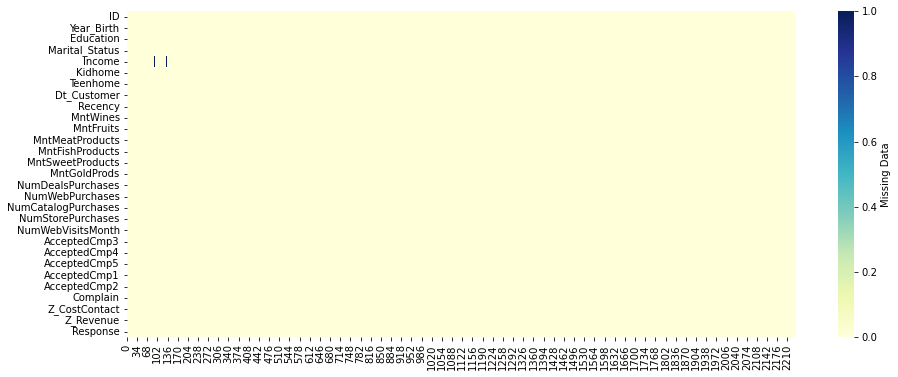

In [4]:
#Detecting columns with missing values
plt.figure(figsize=(15,6))
sns.heatmap(dataset.isna().transpose(),cmap="YlGnBu",cbar_kws={'label': 'Missing Data'})

In [5]:
#Now that we know wich columns got missing values
#We will fill them with the median off all the values 
#Median strategy was used to not take into consideration outliers
columns = dataset.columns
Income = 'Income'
Income_index = columns.get_loc(Income)
Income_index

4

In [6]:
X = dataset.iloc[:,4].values
X = X.reshape(-1,1)
X.shape

(2240, 1)

In [7]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'median' )
imputer = imputer.fit(X)
X = imputer.transform(X)
X

array([[58138.],
       [46344.],
       [71613.],
       ...,
       [56981.],
       [69245.],
       [52869.]])

In [8]:
np.count_nonzero(np.isnan(X))

0

In [9]:
#Creating a column for the age
#Remplacing Missig Values with the median of ages
Actual_year = np.full((2240, 1), 2022)
Age = Actual_year - dataset['Year_Birth'].values.reshape(-1,1)
for i in range(len(Age)):
    if(Age[i]  > 100 or Age[i] < 15):
        Age[i] = np.median(Age)  
Age

array([[65],
       [68],
       [57],
       ...,
       [41],
       [66],
       [68]])

In [10]:
X = np.concatenate((X, Age), 1)

In [11]:
print(X)

[[5.8138e+04 6.5000e+01]
 [4.6344e+04 6.8000e+01]
 [7.1613e+04 5.7000e+01]
 ...
 [5.6981e+04 4.1000e+01]
 [6.9245e+04 6.6000e+01]
 [5.2869e+04 6.8000e+01]]


In [12]:
Preprocessed_Dataset = pd.DataFrame(X) 
Preprocessed_Dataset.columns = ['Income', 'Age']
Preprocessed_Dataset

,Income,Age
0,58138.0,65.0
1,46344.0,68.0
2,71613.0,57.0
3,26646.0,38.0
4,58293.0,41.0
...,...,...
2235,61223.0,55.0
2236,64014.0,76.0
2237,56981.0,41.0
2238,69245.0,66.0


In [ ]:
#We'll have to convert Dt_Customer into a number of days
from datetime import date

actual_date = date(2023, 1, 23)
Number_of_days = []
dataset['Dt_Customer']=pd.to_datetime(dataset['Dt_Customer'])
for i in dataset['Dt_Customer']:
    i = i.date()
    days_delta = actual_date - i
    Number_of_days.append(days_delta.days)
Preprocessed_Dataset.insert(2, "Days of enrollement", Number_of_days, True)

In [14]:
Preprocessed_Dataset

,Income,Age,Days of enrollement
0,58138.0,65.0,3941
1,46344.0,68.0,3095
2,71613.0,57.0,3442
3,26646.0,38.0,3035
4,58293.0,41.0,3291
...,...,...,...
2235,61223.0,55.0,3511
2236,64014.0,76.0,3031
2237,56981.0,41.0,3285
2238,69245.0,66.0,3286


In [15]:
#Sort Education into pre-graduation and post-graduation
X_education = pd.DataFrame(dataset['Education'].values)
X_education.value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
dtype: int64

In [16]:
X_education = X_education.replace({'Basic':'Undergraduate','2n Cycle':'Undergraduate','Graduation':'Graduate','Master':'Graduate','PhD':'Graduate'})
X_education.value_counts()

Graduate         1983
Undergraduate     257
dtype: int64

In [17]:
Preprocessed_Dataset.insert(3, "Education", X_education.values, True)
Preprocessed_Dataset

,Income,Age,Days of enrollement,Education
0,58138.0,65.0,3941,Graduate
1,46344.0,68.0,3095,Graduate
2,71613.0,57.0,3442,Graduate
3,26646.0,38.0,3035,Graduate
4,58293.0,41.0,3291,Graduate
...,...,...,...,...
2235,61223.0,55.0,3511,Graduate
2236,64014.0,76.0,3031,Graduate
2237,56981.0,41.0,3285,Graduate
2238,69245.0,66.0,3286,Graduate


In [18]:
#Sort Marital_Status into alone and couple
X_state = pd.DataFrame(dataset['Marital_Status'].values)
print('Old Value count :\n', X_state.value_counts())
X_state = X_state.replace({'Married':'Couple','Together':'Couple','Single':'Alone','Divorced':'Alone','Widow':'Alone','Alone':'Alone','Absurd':'Alone','YOLO':'Alone'})
print('New value count :\n', X_state.value_counts())

Old Value count :
 Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
dtype: int64
New value count :
 Couple    1444
Alone      796
dtype: int64


In [19]:
Preprocessed_Dataset.insert(4, "Marital_Status", X_state.values, True)
Preprocessed_Dataset

,Income,Age,Days of enrollement,Education,Marital_Status
0,58138.0,65.0,3941,Graduate,Alone
1,46344.0,68.0,3095,Graduate,Alone
2,71613.0,57.0,3442,Graduate,Couple
3,26646.0,38.0,3035,Graduate,Couple
4,58293.0,41.0,3291,Graduate,Couple
...,...,...,...,...,...
2235,61223.0,55.0,3511,Graduate,Couple
2236,64014.0,76.0,3031,Graduate,Couple
2237,56981.0,41.0,3285,Graduate,Alone
2238,69245.0,66.0,3286,Graduate,Couple


In [20]:
#Merge both teenhome and kidhome into one Column reffering to the Family size 
X_children = dataset['Kidhome'].values + dataset['Teenhome'].values
family_size = X_children + Preprocessed_Dataset['Marital_Status'].replace({'Couple' : 2, 'Alone' : 1}).values
family_size = family_size.reshape(-1,1)
Preprocessed_Dataset.insert(5, "Family size", family_size, True)
dataset.insert(0, "Family size", family_size, True)
Preprocessed_Dataset

,Income,Age,Days of enrollement,Education,Marital_Status,Family size
0,58138.0,65.0,3941,Graduate,Alone,1
1,46344.0,68.0,3095,Graduate,Alone,3
2,71613.0,57.0,3442,Graduate,Couple,2
3,26646.0,38.0,3035,Graduate,Couple,3
4,58293.0,41.0,3291,Graduate,Couple,3
...,...,...,...,...,...,...
2235,61223.0,55.0,3511,Graduate,Couple,3
2236,64014.0,76.0,3031,Graduate,Couple,5
2237,56981.0,41.0,3285,Graduate,Alone,1
2238,69245.0,66.0,3286,Graduate,Couple,3


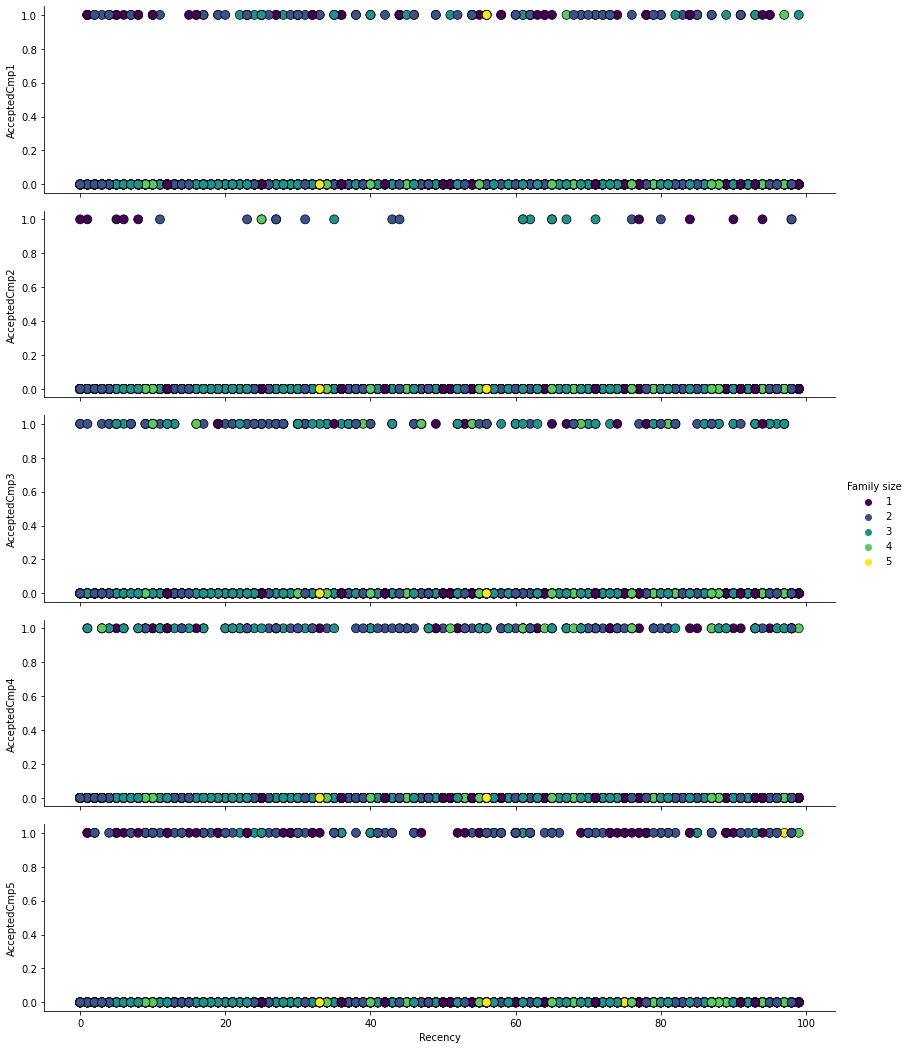

In [21]:
#Plotting the recency in function to AcceptedCmp to see if recency has an impact on the customers reactions 
#to campaigns while taking in consideration the Family size
plot = sns.PairGrid(dataset,
            x_vars = ['Recency'],
            y_vars = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5'],
            hue='Family size',
            palette='viridis'
            )
plot.fig.set_size_inches(15,15)
plot.map(sns.scatterplot, s = 80, ec='black')    
plot.add_legend()    

In [22]:
#       AcceptedCmp1 : We remark that there is a healthy demand from all types of 'Family size'. 
#Would be great to invest well in that part, technically could it be or financially.#
#       AcceptedCmp2 : We can see that in the second phase things start to get softer. But we can still remark a bigger
#demand from the 'Family size' containing 1,2 or 3 members. Would be better to invest more in the Ads for those 
#specific types, while working on improving the approaches to the other type of 'Family size' customers by
#doing tests many times differently.
#       AcceptedCmp3 : We still didn't talk about Recency at all, and that is because the data points were well distributed
#through 'Family Size' all in function of the Recency. But here, it appeals to me by first look that there are some 
#'Family Size' Classes whom densities vary drastically through Recency, especially for families of 4 Members.
#On another hand, there is a clear visual superiority of the type 1,2 and 3. Best thing to do would be to invest 
#more on the Ads when targeting those 3 Customer types, and through all values of reciency. All of that, while trying
#to improve the approaches as much as possible concerning 4 members families, by performing different
#tests on that class preferably with a recency over 50days.
#       AcceptedCmp4 : We can see that there is a homogeneous distribution of the 'Family size' types 2 and 3 all 
#over the recency, and a stronger density comparing to other types. Would be wise to invest in the Ads by 
#targeting primarly families of 2 or 3 members over all values of recency.
#       AcceptedCmp5 : A really huge density domination can be seen for the side of 'Family size' types 1 and 2.
#Would be more beneficial to invest all Money targeting 'Family size' types 1 and 2.

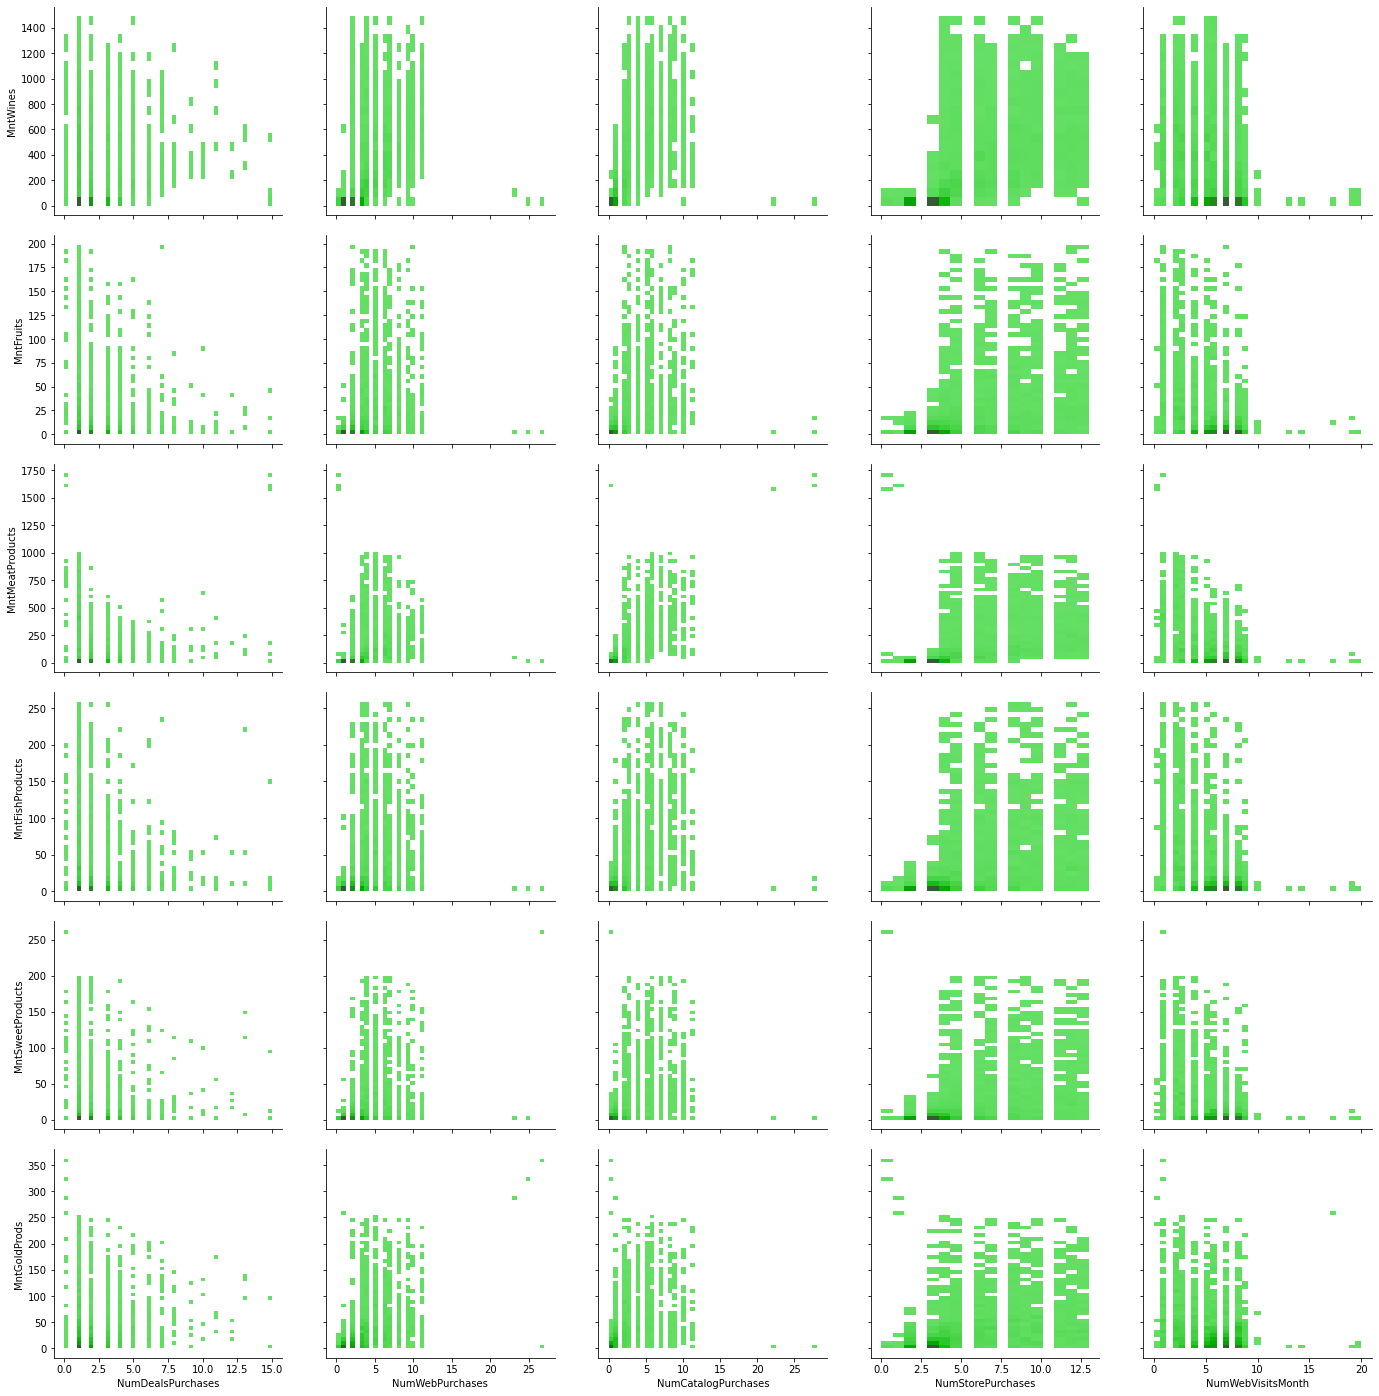

In [23]:
#Plot amounts spent on Meat, fish... in function of the number of purchases and web visits per month
#So we can have an idea about articles bought depending on the selling approach 
plot_ = sns.PairGrid(dataset,
            x_vars = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'],
            y_vars = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'],
            )
plot_.fig.set_size_inches(20,20)
plot_.map(sns.histplot, color = 'green') 

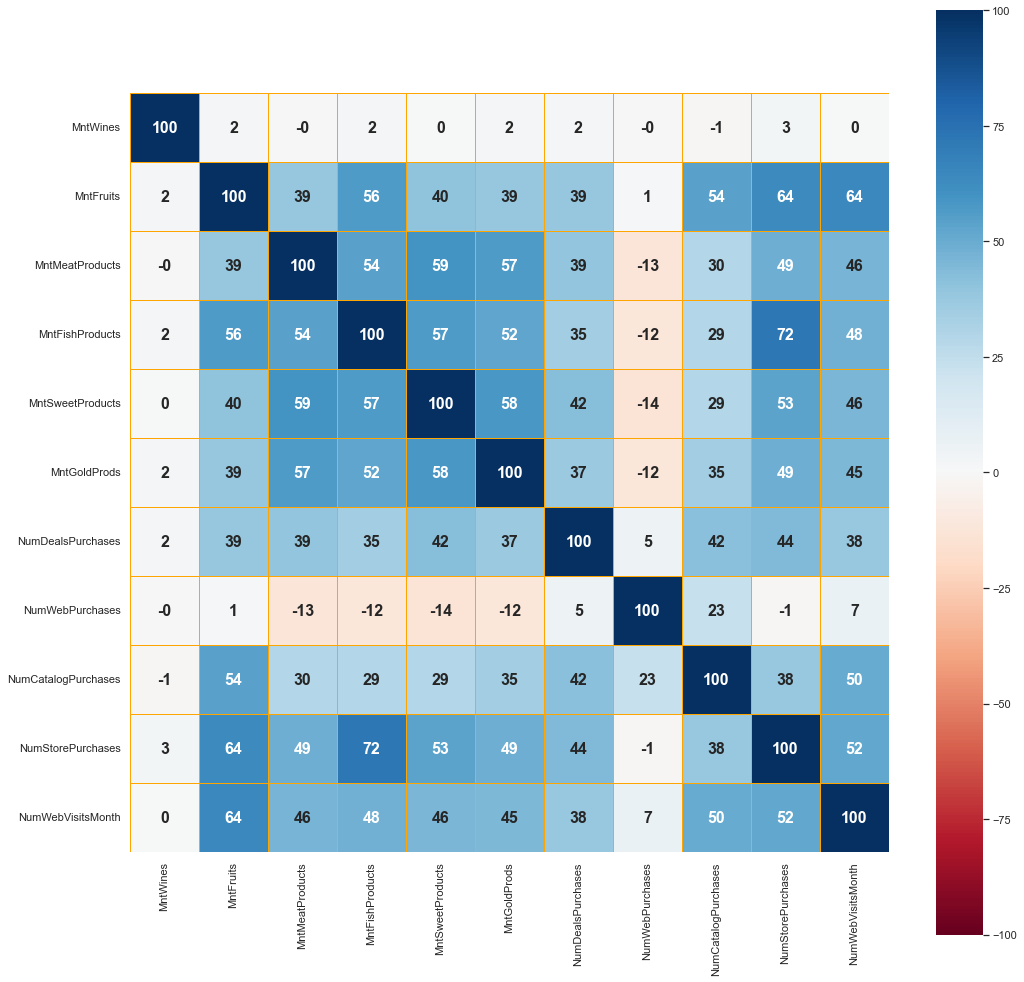

In [37]:
#to help us interpret those histograms better,
#we will be performing a correlation matrix thanks to seaborn's heatmaps
X_corr = pd.DataFrame(dataset.iloc[:,9:20].values)
X_corr.columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
                  'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
plot_corr = sns.heatmap(X_corr.corr()*100, center = 0, vmin=-100, vmax=100, cmap='RdBu',
                        linewidths=0.5, linecolor='Orange', square = True, annot = True, fmt=".0f",
                        annot_kws={
                            'fontsize' : 16,
                            'fontweight' : 'bold'
                        },
                        xticklabels = X_corr.columns, yticklabels = X_corr.columns
                        )
sns.set(rc = {'figure.figsize':(20,20)})

In [26]:
#Merging all types of spendings into 1 Spending column
X_spendings = dataset['MntWines'].values + dataset['MntFruits'].values+dataset['MntMeatProducts'].values
+ dataset['MntFishProducts'].values + dataset['MntSweetProducts'].values + dataset['MntGoldProds'].values
Preprocessed_Dataset.insert(6, "Spendings", X_spendings, True)
Preprocessed_Dataset

,Income,Age,Days of enrollement,Education,Marital_Status,Family size,Spendings
0,58138.0,65.0,3941,Graduate,Alone,1,1269
1,46344.0,68.0,3095,Graduate,Alone,3,18
2,71613.0,57.0,3442,Graduate,Couple,2,602
3,26646.0,38.0,3035,Graduate,Couple,3,35
4,58293.0,41.0,3291,Graduate,Couple,3,334
...,...,...,...,...,...,...,...
2235,61223.0,55.0,3511,Graduate,Couple,3,934
2236,64014.0,76.0,3031,Graduate,Couple,5,436
2237,56981.0,41.0,3285,Graduate,Alone,1,1173
2238,69245.0,66.0,3286,Graduate,Couple,3,672


In [27]:
frames = [Preprocessed_Dataset, X_corr, dataset['Recency']]
Preprocessed_Dataset = pd.concat(frames, axis = 1)
Preprocessed_Dataset

,Income,Age,Days of enrollement,Education,Marital_Status,Family size,Spendings,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Recency
0,58138.0,65.0,3941,Graduate,Alone,1,1269,58,635,88,546,172,88,88,3,8,10,4,58
1,46344.0,68.0,3095,Graduate,Alone,3,18,38,11,1,6,2,1,6,2,1,1,2,38
2,71613.0,57.0,3442,Graduate,Couple,2,602,26,426,49,127,111,21,42,1,8,2,10,26
3,26646.0,38.0,3035,Graduate,Couple,3,35,26,11,4,20,10,3,5,2,2,0,4,26
4,58293.0,41.0,3291,Graduate,Couple,3,334,94,173,43,118,46,27,15,5,5,3,6,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,55.0,3511,Graduate,Couple,3,934,46,709,43,182,42,118,247,2,9,3,4,46
2236,64014.0,76.0,3031,Graduate,Couple,5,436,56,406,0,30,0,0,8,7,8,2,5,56
2237,56981.0,41.0,3285,Graduate,Alone,1,1173,91,908,48,217,32,12,24,1,2,3,13,91
2238,69245.0,66.0,3286,Graduate,Couple,3,672,8,428,30,214,80,30,61,2,6,5,10,8


In [28]:
Preprocessed_Dataset.dtypes

Income                 float64
Age                    float64
Days of enrollement      int64
Education               object
Marital_Status          object
Family size              int64
Spendings                int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Recency                  int64
dtype: object

In [29]:
Preprocessed_Dataset.describe()

,Income,Age,Days of enrollement,Family size,Spendings,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Recency
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52237.975446,53.096875,3482.043304,2.595089,497.187946,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,49.109375
std,25037.955891,11.694144,232.229893,0.906959,521.064882,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,28.962453
min,1730.000000,26.000000,2970.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35538.750000,45.000000,3310.750000,2.000000,42.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,24.000000
50%,51381.500000,52.000000,3483.000000,3.000000,295.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,49.000000
75%,68289.750000,63.000000,3655.250000,3.000000,851.250000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,74.000000
max,666666.000000,82.000000,4033.000000,5.000000,2246.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,99.000000


In [30]:
#Now we'll start the Feature Scaling phase
#We constat that there are some pretty high and different values for standard deviation. Standardization will help
#We will use then RobustScaler for scaling the data using a median strategy
#And LabelEncoder for encoding categorical data
Preprocessed_Dataset_Copy = Preprocessed_Dataset #Conserving a copy of non scaled dataset for further future vizualisations
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
encoder = LabelEncoder()
for i in Preprocessed_Dataset.columns:
    if( i == 'Education' or i == 'Marital_Status'):
        Preprocessed_Dataset[i]=encoder.fit_transform(Preprocessed_Dataset[i])
#Encoding Complete

In [31]:
Preprocessed_Dataset

,Income,Age,Days of enrollement,Education,Marital_Status,Family size,Spendings,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Recency
0,58138.0,65.0,3941,0,0,1,1269,58,635,88,546,172,88,88,3,8,10,4,58
1,46344.0,68.0,3095,0,0,3,18,38,11,1,6,2,1,6,2,1,1,2,38
2,71613.0,57.0,3442,0,1,2,602,26,426,49,127,111,21,42,1,8,2,10,26
3,26646.0,38.0,3035,0,1,3,35,26,11,4,20,10,3,5,2,2,0,4,26
4,58293.0,41.0,3291,0,1,3,334,94,173,43,118,46,27,15,5,5,3,6,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,55.0,3511,0,1,3,934,46,709,43,182,42,118,247,2,9,3,4,46
2236,64014.0,76.0,3031,0,1,5,436,56,406,0,30,0,0,8,7,8,2,5,56
2237,56981.0,41.0,3285,0,0,1,1173,91,908,48,217,32,12,24,1,2,3,13,91
2238,69245.0,66.0,3286,0,1,3,672,8,428,30,214,80,30,61,2,6,5,10,8


In [32]:
#Time for Robust Scaler
Robust_Scaler = RobustScaler()
Robust_Scaler.fit_transform(Preprocessed_Dataset)
Preprocessed_Dataset = pd.DataFrame(Robust_Scaler.transform(Preprocessed_Dataset),columns=Preprocessed_Dataset.columns)
Preprocessed_Dataset.head(20)

,Income,Age,Days of enrollement,Education,Marital_Status,Family size,Spendings,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Recency
0,0.206299,0.722222,1.329463,0.0,-1.0,-2.0,1.203584,0.18,0.960458,2.50000,2.217593,3.404255,2.50000,1.361702,0.5,1.00,2.00,-0.2,0.18
1,-0.153812,0.888889,-1.126270,0.0,-1.0,0.0,-0.342292,-0.22,-0.338189,-0.21875,-0.282407,-0.212766,-0.21875,-0.382979,0.0,-0.75,-0.25,-0.6,-0.22
2,0.617737,0.277778,-0.119013,0.0,0.0,-1.0,0.379364,-0.46,0.525494,1.28125,0.277778,2.106383,0.40625,0.382979,-0.5,1.00,0.00,1.0,-0.46
3,-0.755259,-0.777778,-1.300435,0.0,0.0,0.0,-0.321285,-0.46,-0.338189,-0.12500,-0.217593,-0.042553,-0.15625,-0.404255,0.0,-0.50,-0.50,-0.2,-0.46
4,0.211032,-0.611111,-0.557329,0.0,0.0,0.0,0.048193,0.90,-0.001041,1.09375,0.236111,0.723404,0.59375,-0.191489,1.5,0.25,0.25,0.2,0.90
5,0.339883,0.166667,-0.174165,0.0,0.0,0.0,0.451035,-0.66,0.721124,1.06250,0.143519,-0.255319,1.06250,-0.212766,0.0,0.50,0.50,1.0,-0.66
6,0.129874,-0.055556,0.696662,0.0,-1.0,-1.0,0.208835,-0.30,0.127992,1.78125,0.449074,0.808511,1.28125,0.063830,1.0,0.75,0.25,0.4,-0.30
7,-0.547388,-0.833333,-0.072569,0.0,0.0,0.0,-0.189064,-0.34,-0.202914,0.06250,-0.050926,-0.191489,-0.21875,-0.021277,0.0,0.00,-0.50,-0.2,-0.34
8,-0.642133,-0.222222,0.101597,0.0,0.0,0.0,-0.317578,-0.60,-0.331946,-0.25000,-0.199074,-0.191489,-0.15625,-0.468085,-0.5,-0.25,-0.50,-0.6,-0.60
9,-1.396400,1.111111,-0.711176,0.0,0.0,1.0,-0.322521,0.38,-0.302810,-0.25000,-0.282407,-0.234043,-0.21875,-0.234043,-0.5,-0.75,-0.50,-1.0,0.38


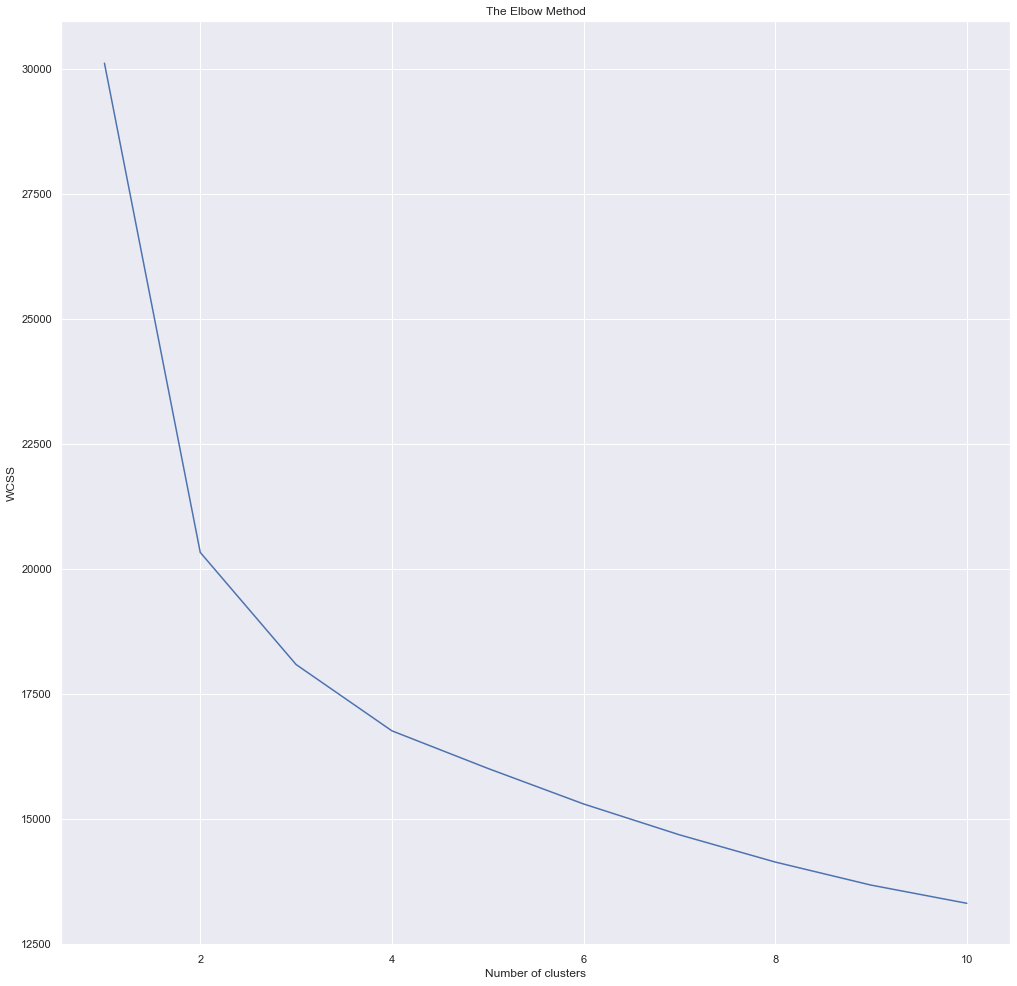

In [33]:
#Creation of Model 
#We will be using K-Means, then perform a hierarchical clustering, so we will have to first perform the elbow method
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(Preprocessed_Dataset)
    wcss.append(kmeans.inertia_) #Appending values of Euclidian distances between data points into the WCSS matrix
plot_wcss = plt.plot(range(1, 11), wcss)
plt.rcParams["figure.figsize"] = (10,10)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [2]:
# 5 Clusters will be good

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_kmeans = hc.fit_predict(Preprocessed_Dataset)
Preprocessed_Dataset['cluster'] = y_kmeans + 1
Preprocessed_Dataset['cluster']

0       1
1       3
2       4
3       3
4       2
       ..
2235    1
2236    2
2237    4
2238    4
2239    2
Name: cluster, Length: 2240, dtype: int64

/Users/yben409/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


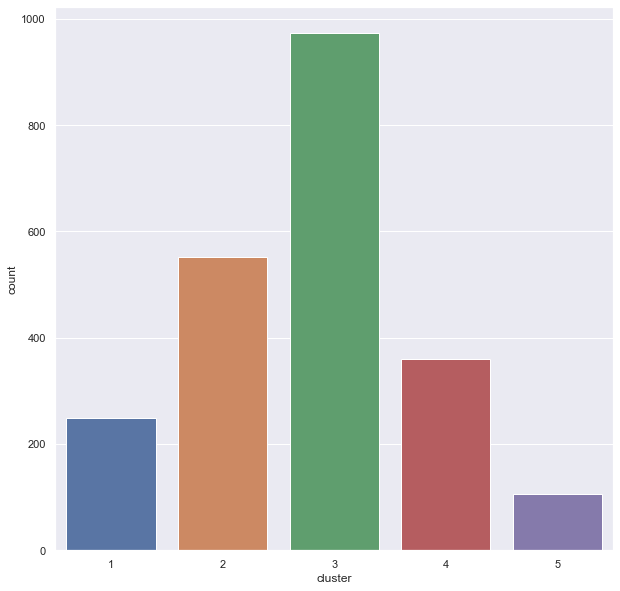

In [ ]:
sns.countplot(Preprocessed_Dataset['cluster'])
plt.rcParams["figure.figsize"] = (15,15)
plt.show()

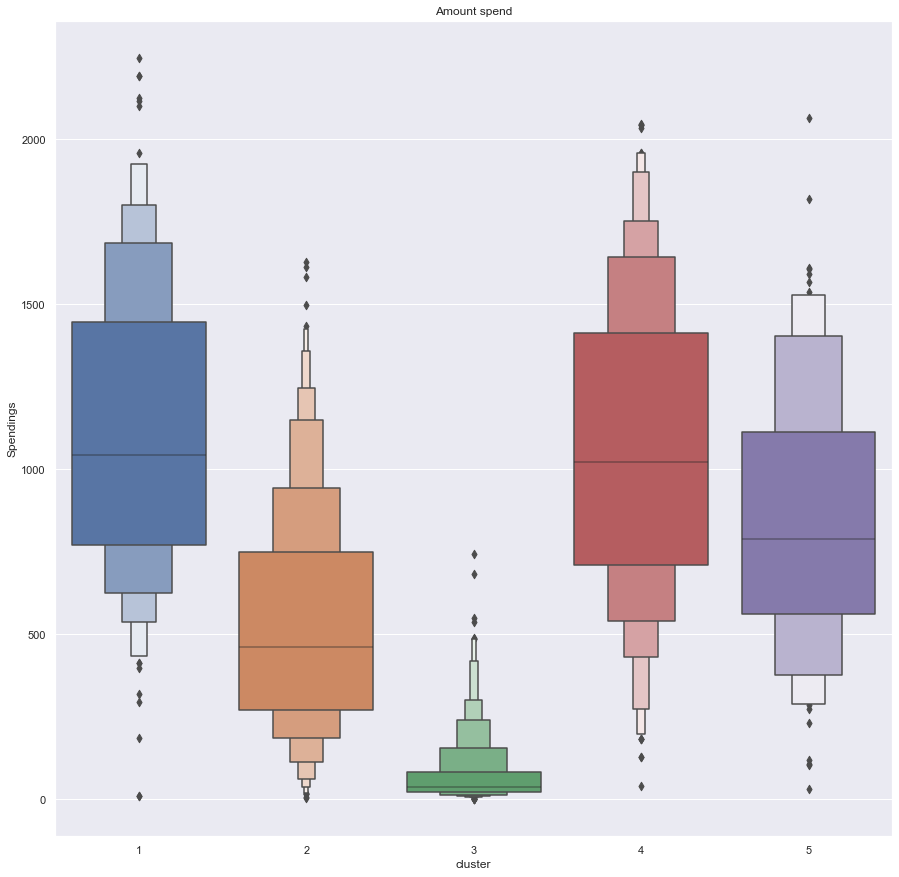

In [ ]:
plt.figure()
box_plot=sns.boxenplot(x=Preprocessed_Dataset["cluster"],y=Preprocessed_Dataset_Copy["Spendings"])
box_plot.set_title("Amount spent")
plt.show()

In [ ]:
#Cluster 3 is the one counting the most customers, however, it is also the one counting the less spending power !
#Wich is kind of obvious because the vast majority of people coming to the stores are looking for the essentials only.

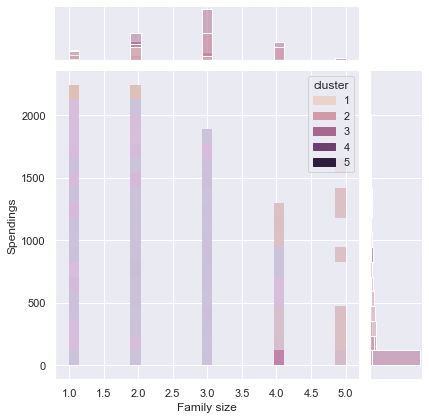

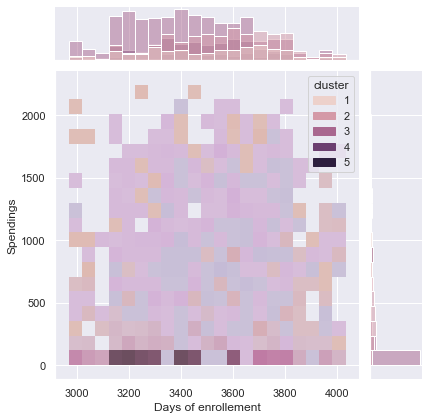

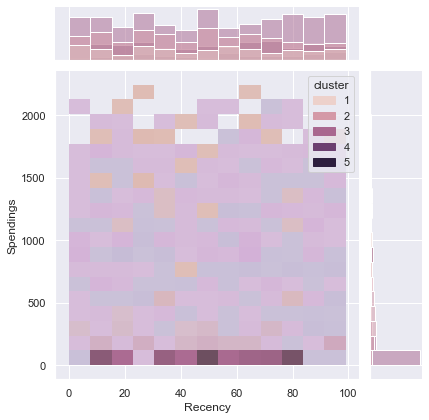

In [ ]:
To_joinplot = ['Family size', 'Days of enrollement', 'Recency']
for i in To_joinplot:
    sns.jointplot(x=Preprocessed_Dataset_Copy[i],y=Preprocessed_Dataset_Copy["Spendings"],hue=Preprocessed_Dataset["cluster"], kind = 'hist')
    plt.show()